# Preprocessing & Exploratory Data Analysis  
## Satellite Imagery–Based Property Valuation

This notebook performs:
- Data cleaning and preprocessing
- Exploratory data analysis (EDA)
- Feature selection
- Saving clean datasets for downstream modeling


In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')


Mounted at /content/drive


In [3]:
DATA_PATH = "/content/drive/MyDrive/IIT_Roorkee_Project/data/"

train_df = pd.read_excel(DATA_PATH + "train.xlsx")
test_df  = pd.read_excel(DATA_PATH + "test.xlsx")

print(train_df.shape, test_df.shape)
train_df.head()


(16209, 21) (5404, 20)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [4]:
train_df.info()
train_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.620900e+04,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,4.575771e+09,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,1784.754396,288.520205,1971.152755,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707
std,2.874661e+09,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,821.820844,438.598910,29.372698,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012
min,1.000102e+06,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000
50%,3.904950e+09,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000
75%,7.304301e+09,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000
max,9.900000e+09,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
from sklearn.impute import SimpleImputer

# Feature list WITH id
MODEL_FEATURES = [
    'id',
    'bedrooms','bathrooms','sqft_living','sqft_lot',
    'floors','condition','grade','waterfront','view',
    'sqft_living15','sqft_lot15','lat','long'
]

# Columns to impute (exclude 'id')
NUM_FEATURES = [
    'bedrooms','bathrooms','sqft_living','sqft_lot',
    'floors','condition','grade','waterfront','view',
    'sqft_living15','sqft_lot15','lat','long'
]

imputer = SimpleImputer(strategy="median")

train_df[NUM_FEATURES] = imputer.fit_transform(train_df[NUM_FEATURES])
test_df[NUM_FEATURES]  = imputer.transform(test_df[NUM_FEATURES])


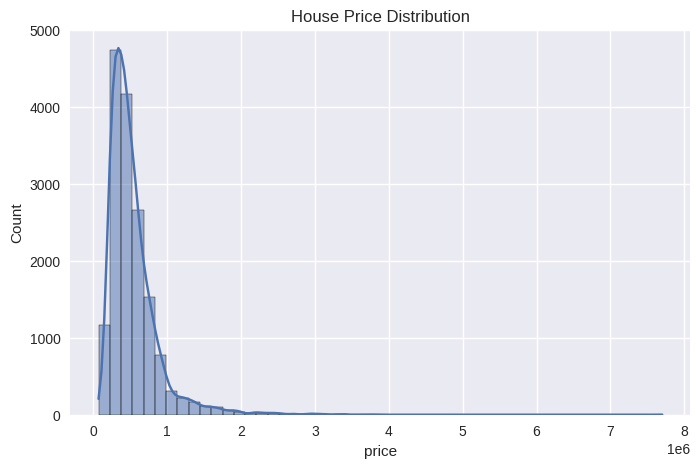

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(train_df['price'], bins=50, kde=True)
plt.title("House Price Distribution")
plt.show()


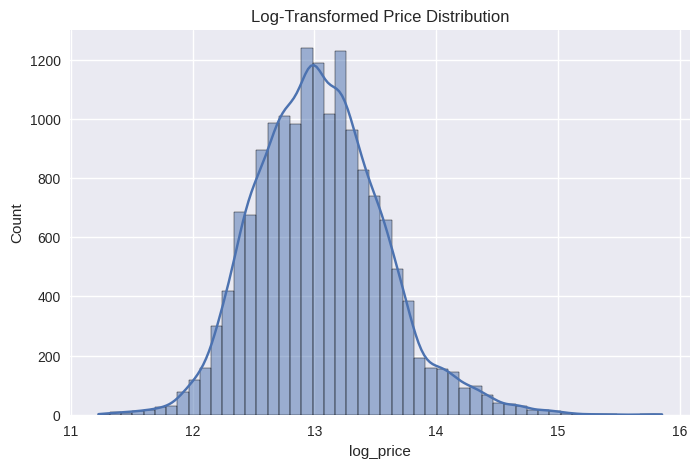

In [7]:
train_df['log_price'] = np.log1p(train_df['price'])

plt.figure(figsize=(8,5))
sns.histplot(train_df['log_price'], bins=50, kde=True)
plt.title("Log-Transformed Price Distribution")
plt.show()


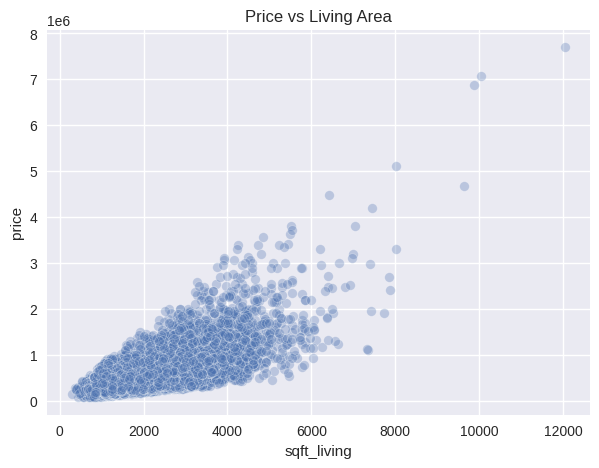

In [8]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=train_df['sqft_living'], y=train_df['price'], alpha=0.3)
plt.title("Price vs Living Area")
plt.show()


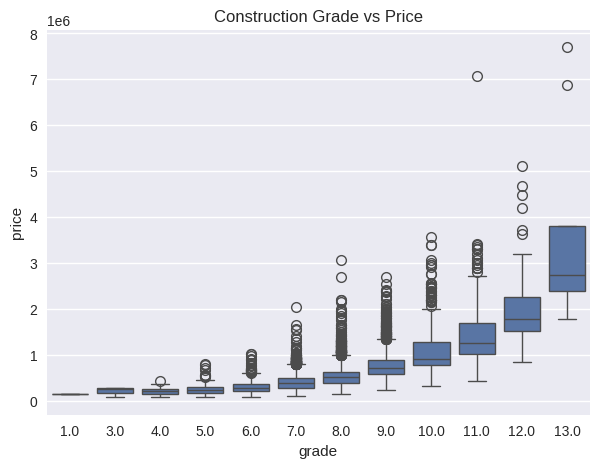

In [9]:
plt.figure(figsize=(7,5))
sns.boxplot(x='grade', y='price', data=train_df)
plt.title("Construction Grade vs Price")
plt.show()


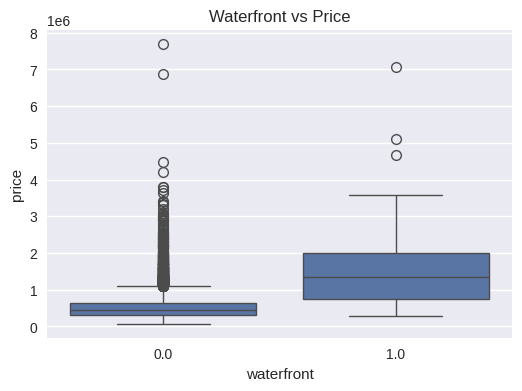

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x='waterfront', y='price', data=train_df)
plt.title("Waterfront vs Price")
plt.show()


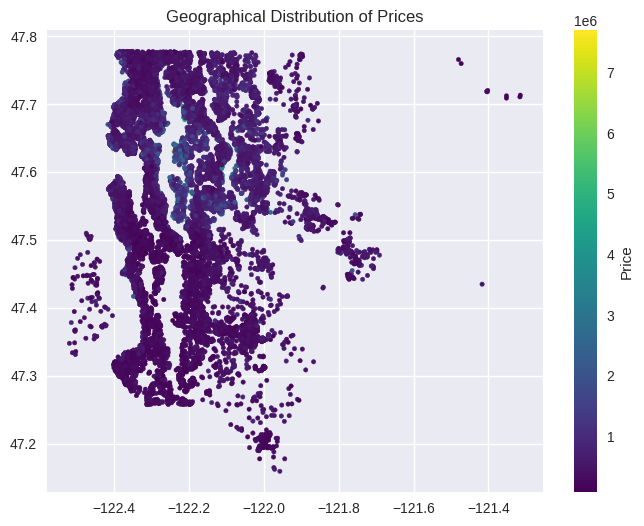

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(
    train_df['long'], train_df['lat'],
    c=train_df['price'], cmap='viridis', s=10
)
plt.colorbar(label='Price')
plt.title("Geographical Distribution of Prices")
plt.show()


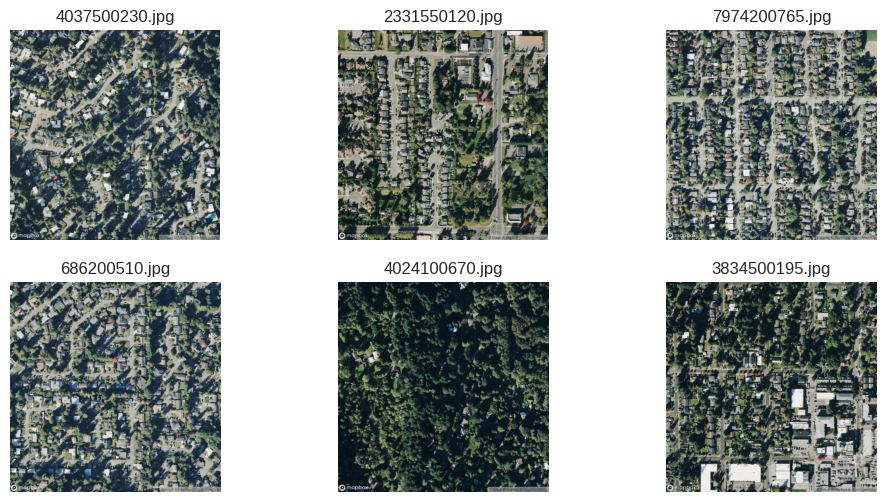

In [12]:
import os
from PIL import Image

IMAGE_DIR = "/content/drive/MyDrive/IIT_Roorkee_Project/images/"
sample_images = os.listdir(IMAGE_DIR)[:6]

plt.figure(figsize=(12,6))
for i, img in enumerate(sample_images):
    plt.subplot(2,3,i+1)
    plt.imshow(Image.open(os.path.join(IMAGE_DIR, img)))
    plt.axis('off')
    plt.title(img)
plt.show()


In [13]:
train_model_df = train_df[MODEL_FEATURES + ['log_price']]
test_model_df  = test_df[MODEL_FEATURES]


In [14]:
from sklearn.model_selection import train_test_split

X = train_model_df.drop(columns=['log_price'])
y = train_model_df['log_price']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
BASE_PATH = "/content/drive/MyDrive/IIT_Roorkee_Project/data/"

X_train.to_csv(BASE_PATH + "X_train.csv", index=False)
X_val.to_csv(BASE_PATH + "X_val.csv", index=False)
y_train.to_csv(BASE_PATH + "y_train.csv", index=False)
y_val.to_csv(BASE_PATH + "y_val.csv", index=False)
test_model_df.to_csv(BASE_PATH + "test_processed.csv", index=False)


### Preprocessing Summary
- Handled missing values using median imputation
- Applied log transformation to stabilize target distribution
- Selected structural, neighborhood, and geospatial features
- Saved clean datasets for reproducible modeling
